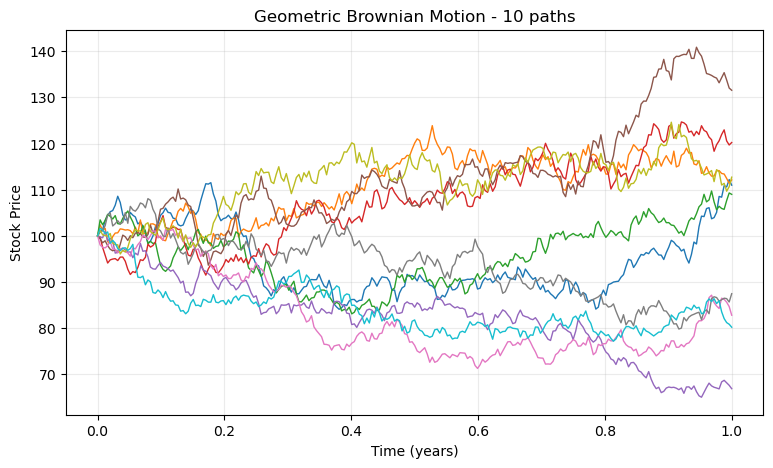

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Geometric Brownian Motion
mu = 0.1        # drift
sigma = 0.2     # volatility
S0 = 100.0      # initial price
T = 1.0         # time horizon (1 year)
N = 252         # number of steps (daily)
dt = T / N
num_paths = 10  # number of sample paths

# Time grid: N+1 points including t=0
t = np.linspace(0, T, N+1)               # shape (N+1,)

# Simulate increments Z of shape (num_paths, N)
Z = np.random.standard_normal(size=(num_paths, N))
W_increments = np.sqrt(dt) * Z           # shape (num_paths, N)
W = np.cumsum(W_increments, axis=1)      # shape (num_paths, N)
# prepend W0 = 0 to get shape (num_paths, N+1)
W = np.hstack((np.zeros((num_paths, 1)), W))  # shape (num_paths, N+1)

# Construct S: make sure the time array broadcasts correctly
# ((mu - 0.5*sigma^2) * t) has shape (N+1,) -> add axis to (1, N+1) so it broadcasts with W
drift_term = (mu - 0.5 * sigma**2) * t    # shape (N+1,)
S = S0 * np.exp(drift_term[None, :] + sigma * W)  # shape (num_paths, N+1)

# Plot
plt.figure(figsize=(9,5))
for i in range(num_paths):
    plt.plot(t, S[i], lw=1)
plt.title("Geometric Brownian Motion - {} paths".format(num_paths))
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.grid(alpha=0.25)
plt.show()
